In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import mplfinance as mpf
import datetime as dt
import talib as ta

In [2]:
data = pd.read_csv('apple.csv')
data.index = pd.DatetimeIndex(data['Date'])

In [3]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2022-01-03,2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,180.959747
2022-01-04,2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,178.663086
2022-01-05,2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,173.910645
2022-01-06,2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.007523
2022-01-07,2022-01-07,174.139999,171.029999,172.889999,172.169998,86709100.0,171.176514


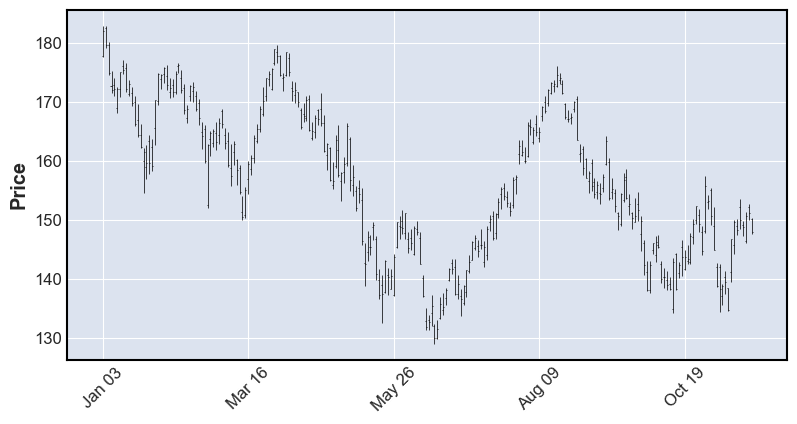

In [4]:
# bar chart
mpf.plot(data,figsize = (10,5))

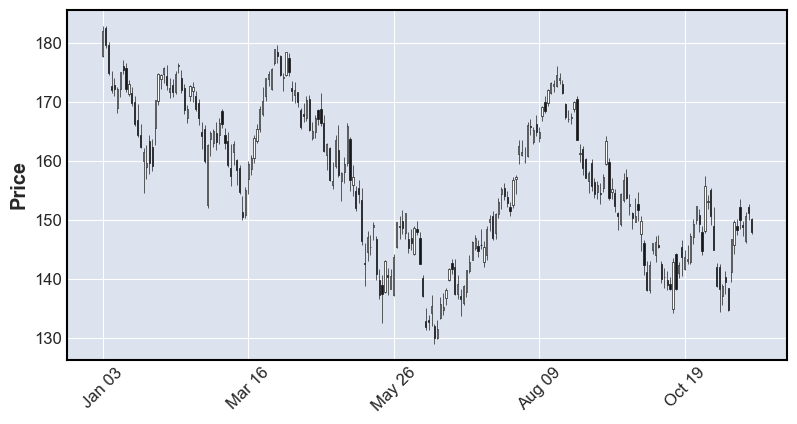

In [5]:
# candle chart الأكثر إستخداماً
mpf.plot(data,figsize = (10,5),type='candle')

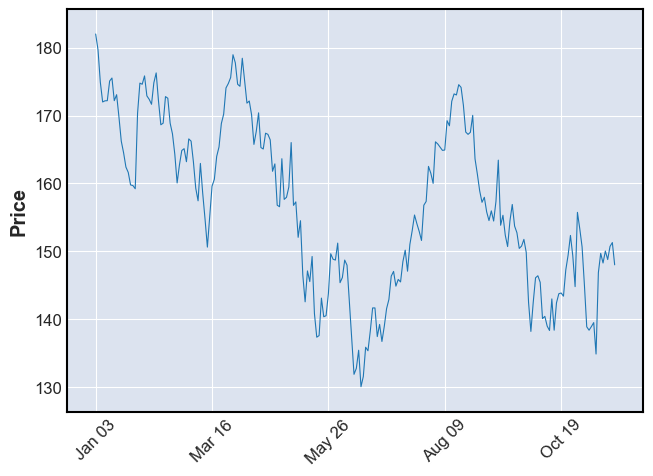

In [6]:
# المنحنى الخطي 
mpf.plot(data,type='line')

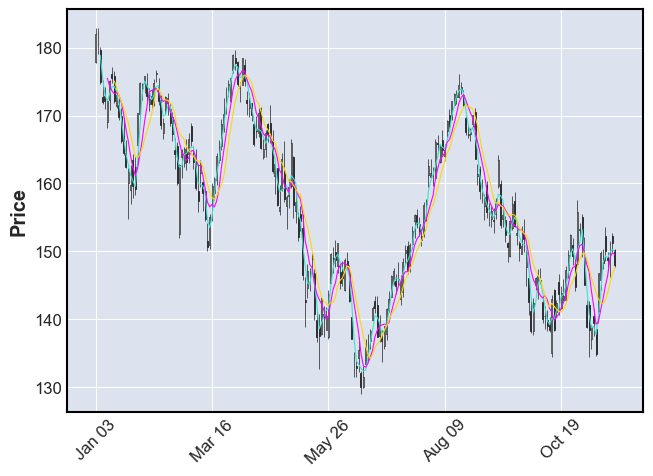

In [7]:
# نلاحظ هنا أن متوسطات الحركة غير واضحة 
mpf.plot(data,type='candle',mav=(3,6,9))

In [8]:
s = mpf.make_mpf_style(base_mpl_style='seaborn')

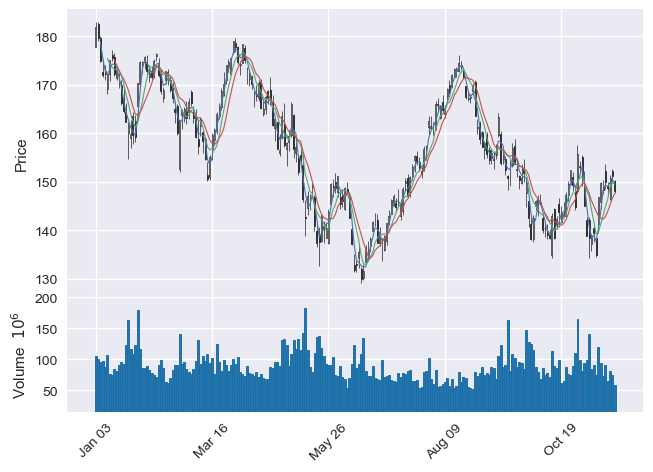

In [9]:
mpf.plot(data,type='candle',mav=(3,6,9),volume=True,show_nontrading=False,style=s)

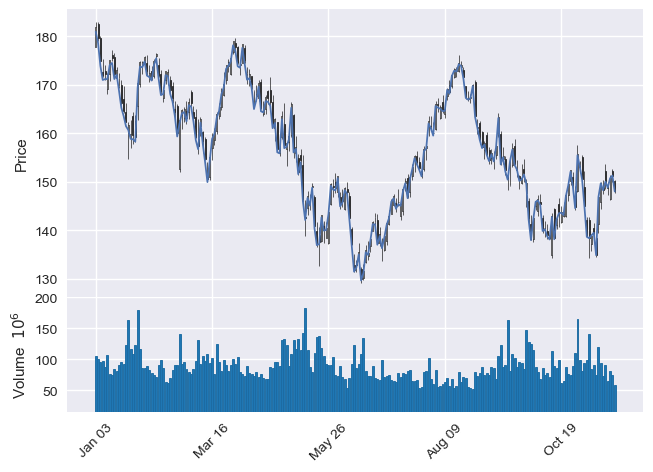

In [10]:
#  إضافة مخططات على المخطط الأصلي  
apdict = mpf.make_addplot(data['Adj Close'])

mpf.plot(data,type='candle',volume=True,addplot=apdict,style=s)

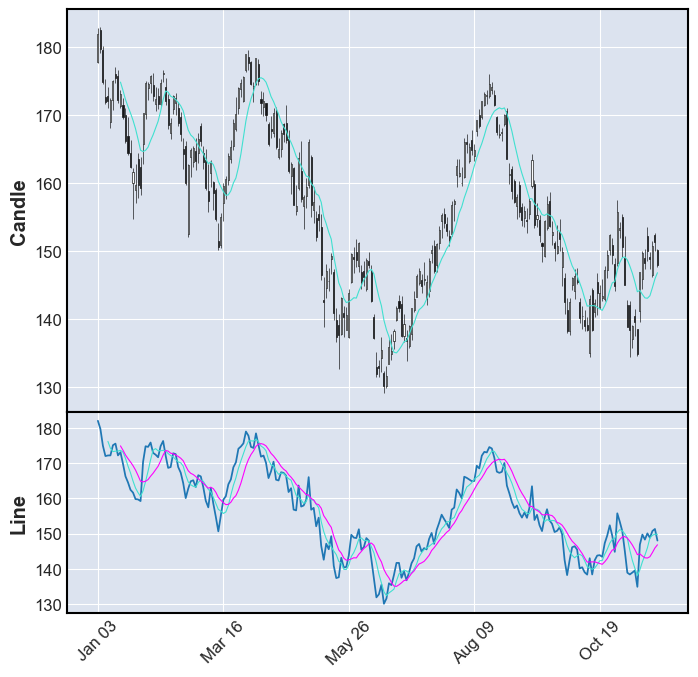

In [12]:
ap = mpf.make_addplot(data['Close'],
                      panel=1,type='line',ylabel='Line',mav=(5,10))

mpf.plot(data,mav=10,type='candle',ylabel='Candle',addplot=ap,
         panel_ratios=(2,1),figratio=(1,1),figscale=1.5)


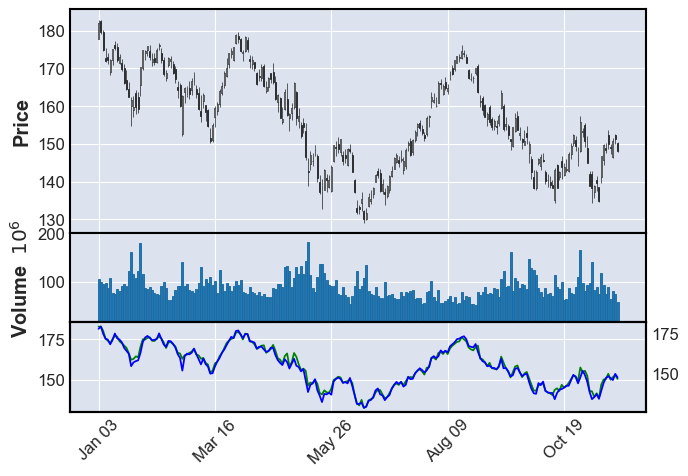

In [13]:
ap2 = [ mpf.make_addplot(data['High'],color='g',panel=2),  # panel 2 specified
        mpf.make_addplot(data['Low'],color='b',panel=2),  # panel 2 specified
      ]
mpf.plot(data,type='candle',volume=True,addplot=ap2)

In [14]:
# macdالخطوط الدالة على مؤشر   
data['macd'], data['macdsignal'], data['macdhist'] =ta.MACD(data['Close'], fastperiod=12, slowperiod=26,signalperiod=9)

In [15]:
data['14-low'] = data['Low'].rolling(14).min()
data['14-High'] = data['Low'].rolling(14).max()


In [16]:
data['%K'] = (data['Close'] - data['14-low']) * 100 / (data['14-High'] - data['14-low'])
data['%D'] = data['%K'].rolling(3).mean()

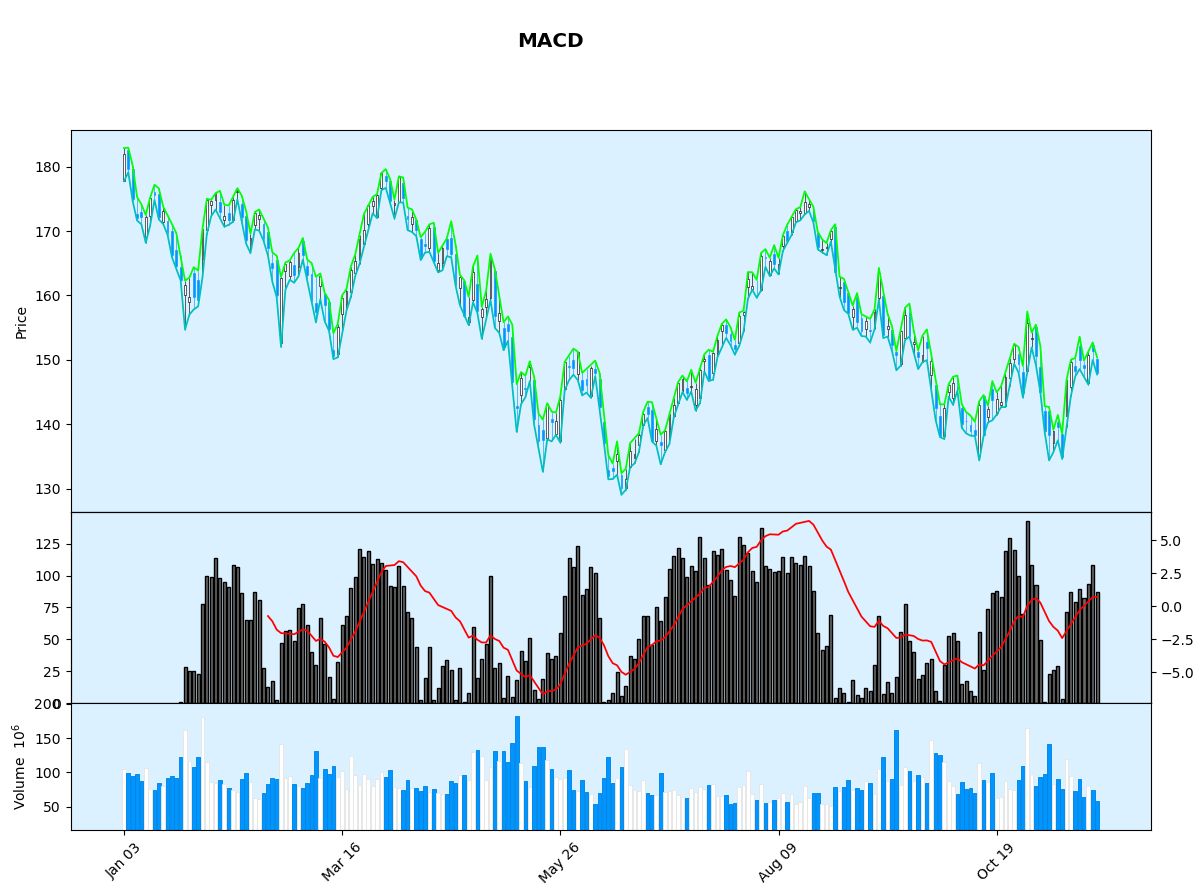

In [17]:

apds = [mpf.make_addplot(data['High'],color='lime',),
        mpf.make_addplot(data['Low'],color='c'),
        mpf.make_addplot(data['%K'],type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(data['macd'],panel=1,color='r',secondary_y=True),
       ]

mpf.plot(data,figsize=(15,10),type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style='blueskies',volume=True,volume_panel=2,panel_ratios=(6,3,2))
